In [1]:
import os
import glob
import numpy as np
import csv
import librosa

import matplotlib.pyplot as plt

In [ ]:
train_metadata_path = '../data/train.txt'
valid_metadata_path = '../data/valid.txt'

In [ ]:
train_file_list = list()
valid_file_list = list()

with open(train_metadata_path, 'r') as file:
    with open('local_train.txt', 'w') as csvfile:
        csv_writer = csv.writer(csvfile)

        while True:
            line = file.readline()

            if line is None or len(line) == 0:
                break

            contents = line.split(',')
            wav_file_path = contents[0]
            
            contents[2] = contents[2].strip()

            new_wav_file_path = os.path.join('train', wav_file_path.split('/')[-1])
            contents[0] = new_wav_file_path
            
            contents.pop(1)

            csv_writer.writerow(contents)

            
with open(valid_metadata_path, 'r') as file:
    with open('local_valid.txt', 'w') as csvfile:
        csv_writer = csv.writer(csvfile)

        while True:
            line = file.readline()

            if line is None or len(line) == 0:
                break

            contents = line.split(',')
            wav_file_path = contents[0]
            
            contents[2] = contents[2].strip()

            new_wav_file_path = os.path.join('valid', wav_file_path.split('/')[-1])
            contents[0] = new_wav_file_path
            
            contents.pop(1)

            csv_writer.writerow(contents)

In [5]:
local_train_metadata_path = 'local_train.txt'
local_valid_metadata_path = 'local_valid.txt'

def load_class_statistics(metadata_path):
    
    class_counter_dict = dict()
    
    with open(metadata_path, 'r') as file:

        while True:
            line = file.readline()

            if line is None or len(line) == 0:
                break

            contents = line.split(',')
            label_string = contents[1].strip()

            labels = label_string.split('|')

            for label in labels:
                (start, end, class_name) = label.split('^')
                if class_name not in class_counter_dict.keys():
                    class_counter_dict[class_name] = 0
                class_counter_dict[class_name] += 1
                
    return class_counter_dict

In [6]:
class_counter_train_dict = load_class_statistics(local_train_metadata_path)
class_counter_train_dict_list = sorted(class_counter_train_dict.items())
class_counter_train_dict = {pair[0]: pair[1] for pair in class_counter_train_dict_list}

class_counter_valid_dict = load_class_statistics(local_valid_metadata_path)
class_counter_valid_dict_list = sorted(class_counter_valid_dict.items())
class_counter_valid_dict = {pair[0]: pair[1] for pair in class_counter_valid_dict_list}


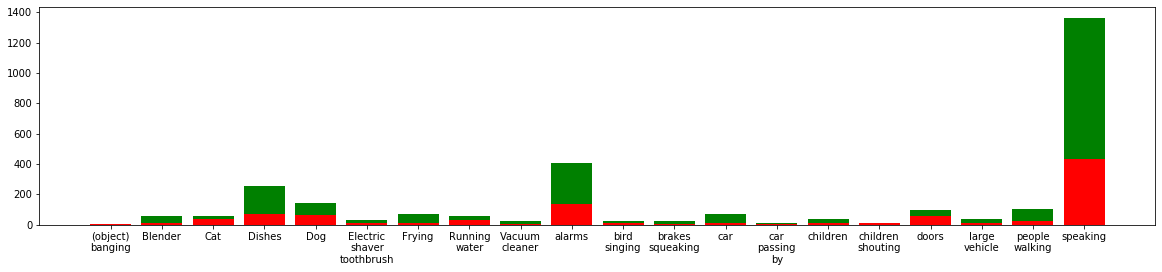

In [7]:
plt.figure(figsize=(20, 4))
key_list = list(class_counter_train_dict.keys())

for i, key in enumerate(key_list):
    key_list[i] = key.replace('_', '\n').replace(' ', '\n')

fig = plt.bar(key_list, class_counter_train_dict.values(), 0.8, color='g')
fig = plt.bar(key_list, class_counter_valid_dict.values(), 0.8, color='r')

plt.show()

In [8]:
os.makedirs('train', exist_ok=True)
os.makedirs('valid', exist_ok=True)

In [9]:
key_list = list(class_counter_train_dict.keys())

for key in key_list:
    os.makedirs(os.path.join('train', key), exist_ok=True)
    os.makedirs(os.path.join('valid', key), exist_ok=True)

In [60]:
local_train_metadata_path = 'local_train.txt'
local_valid_metadata_path = 'local_valid.txt'

def split_wav_file(metadata_path):
    
    with open(metadata_path, 'r') as file:

        while True:
            line = file.readline()

            if line is None or len(line) == 0:
                break

            contents = line.split(',')
            parent_path = contents[0].split('/')[0]
            wav_name = contents[0].split('/')[-1]
            
            data, fs = librosa.core.load(os.path.join('../data', contents[0]), sr=None)
            
#             print('[MAX: {:10f} MIN: {:10f}]'.format(max(data), min(data)))
            
            label_string = contents[1].strip()

            labels = label_string.split('|')
            
            print('[{}]'.format(contents[0]))
            print('({:10d} ~ {:10d})'.format(int(0), len(data)))

            for i, label in enumerate(labels):
                (start, end, class_name) = label.split('^')
                start_idx = int(float(start) * fs)
                end_idx = int(float(end) * fs)
                output_wav_name = wav_name.replace('.wav', '_{:02d}.wav'.format(i))
                output_file_name = os.path.join(os.path.join(parent_path, class_name), output_wav_name)
                
                librosa.output.write_wav(output_file_name, data[start_idx:end_idx], fs)
                print(output_file_name)
                print('[{:10d} ~ {:10d}] [{}]'.format(start_idx, end_idx, class_name))
                
            print()
                
    return

In [62]:
split_wav_file(local_valid_metadata_path)

[valid/YRxYaU8ucFis_30.000_40.000.wav]
(         0 ~     441000)
valid/speaking/YRxYaU8ucFis_30.000_40.000_00.wav
[         0 ~      23064] [speaking]
valid/alarms/YRxYaU8ucFis_30.000_40.000_01.wav
[     32986 ~     235670] [alarms]
valid/speaking/YRxYaU8ucFis_30.000_40.000_02.wav
[     78542 ~     112366] [speaking]
valid/speaking/YRxYaU8ucFis_30.000_40.000_03.wav
[    125155 ~     164978] [speaking]
valid/speaking/YRxYaU8ucFis_30.000_40.000_04.wav
[    234656 ~     425300] [speaking]

[valid/a129_230.000_240.000.wav]
(         0 ~     441000)
valid/people walking/a129_230.000_240.000_00.wav
[         0 ~      60857] [people walking]
valid/children/a129_230.000_240.000_01.wav
[         0 ~      48245] [children]
valid/speaking/a129_230.000_240.000_02.wav
[     81673 ~     158054] [speaking]
valid/people walking/a129_230.000_240.000_03.wav
[    266540 ~     440955] [people walking]

[valid/Y-lK7eYXq2ZQ_30.000_40.000.wav]
(         0 ~     441000)
valid/speaking/Y-lK7eYXq2ZQ_30.000_40.0

[valid/b100_110.000_120.000.wav]
(         0 ~     441000)
valid/speaking/b100_110.000_120.000_00.wav
[         0 ~     154305] [speaking]
valid/people walking/b100_110.000_120.000_01.wav
[         0 ~      44452] [people walking]
valid/large vehicle/b100_110.000_120.000_02.wav
[         0 ~     440955] [large vehicle]
valid/large vehicle/b100_110.000_120.000_03.wav
[    424727 ~     440955] [large vehicle]

[valid/Ya2prr9ZiFxA_580.000_590.000.wav]
(         0 ~     441000)
valid/speaking/Ya2prr9ZiFxA_580.000_590.000_00.wav
[         0 ~      48069] [speaking]
valid/Running_water/Ya2prr9ZiFxA_580.000_590.000_01.wav
[     72809 ~     233862] [Running_water]
valid/speaking/Ya2prr9ZiFxA_580.000_590.000_02.wav
[    145662 ~     233862] [speaking]
valid/Running_water/Ya2prr9ZiFxA_580.000_590.000_03.wav
[    300276 ~     434561] [Running_water]
valid/speaking/Ya2prr9ZiFxA_580.000_590.000_04.wav
[    345876 ~     386492] [speaking]

[valid/YN_NCQdSQ0eA_220.000_230.000.wav]
(         0 ~     4

[valid/YBfsxrvRNJe0_100.000_110.000.wav]
(         0 ~     441000)
valid/speaking/YBfsxrvRNJe0_100.000_110.000_00.wav
[         0 ~      30032] [speaking]
valid/Electric_shaver_toothbrush/YBfsxrvRNJe0_100.000_110.000_01.wav
[     45202 ~     412246] [Electric_shaver_toothbrush]
valid/speaking/YBfsxrvRNJe0_100.000_110.000_02.wav
[    414187 ~     440955] [speaking]

[valid/YrW9BQJBvEZQ_430.000_440.000.wav]
(         0 ~     441000)
valid/speaking/YrW9BQJBvEZQ_430.000_440.000_00.wav
[         0 ~      51067] [speaking]
valid/alarms/YrW9BQJBvEZQ_430.000_440.000_01.wav
[     98960 ~     173930] [alarms]
valid/speaking/YrW9BQJBvEZQ_430.000_440.000_02.wav
[    143016 ~     440955] [speaking]

[valid/YzcfvCrX-Lts_130.000_140.000.wav]
(         0 ~     441000)
valid/Dishes/YzcfvCrX-Lts_130.000_140.000_00.wav
[     27738 ~      64959] [Dishes]
valid/speaking/YzcfvCrX-Lts_130.000_140.000_01.wav
[     84054 ~     149013] [speaking]
valid/speaking/YzcfvCrX-Lts_130.000_140.000_02.wav
[    161053 ~ 

[valid/a127_100.000_110.000.wav]
(         0 ~     441000)
valid/people walking/a127_100.000_110.000_00.wav
[         0 ~     440955] [people walking]
valid/brakes squeaking/a127_100.000_110.000_01.wav
[         0 ~      42380] [brakes squeaking]
valid/large vehicle/a127_100.000_110.000_02.wav
[         0 ~     440955] [large vehicle]
valid/speaking/a127_100.000_110.000_03.wav
[         0 ~     156775] [speaking]
valid/large vehicle/a127_100.000_110.000_04.wav
[    373086 ~     440955] [large vehicle]

[valid/Y2zGw5RW79xI_30.000_40.000.wav]
(         0 ~     441000)
valid/speaking/Y2zGw5RW79xI_30.000_40.000_00.wav
[         0 ~      93624] [speaking]
valid/Running_water/Y2zGw5RW79xI_30.000_40.000_01.wav
[    251811 ~     440955] [Running_water]

[valid/a012_120.000_130.000.wav]
(         0 ~     441000)
valid/speaking/a012_120.000_130.000_00.wav
[         0 ~     440955] [speaking]
valid/children shouting/a012_120.000_130.000_01.wav
[     29150 ~      72235] [children shouting]

[valid

valid/speaking/Y-Cdx8zogHI0_260.000_270.000_00.wav
[         0 ~      53978] [speaking]
valid/speaking/Y-Cdx8zogHI0_260.000_270.000_01.wav
[    119070 ~     260939] [speaking]

[valid/a129_60.000_70.000.wav]
(         0 ~     441000)
valid/car/a129_60.000_70.000_00.wav
[         0 ~     124758] [car]
valid/car/a129_60.000_70.000_01.wav
[     63151 ~      90493] [car]
valid/car/a129_60.000_70.000_02.wav
[    119555 ~     383405] [car]
valid/people walking/a129_60.000_70.000_03.wav
[    160347 ~     203301] [people walking]
valid/speaking/a129_60.000_70.000_04.wav
[    170314 ~     440955] [speaking]
valid/car/a129_60.000_70.000_05.wav
[    383405 ~     440955] [car]

[valid/YUj2Os8tYIIQ_400.000_410.000.wav]
(         0 ~     441000)
valid/speaking/YUj2Os8tYIIQ_400.000_410.000_00.wav
[     58388 ~     157701] [speaking]
valid/speaking/YUj2Os8tYIIQ_400.000_410.000_01.wav
[    179178 ~     204271] [speaking]
valid/Dishes/YUj2Os8tYIIQ_400.000_410.000_02.wav
[    213003 ~     228879] [Dishes

valid/Blender/YfPC2b7tRXfQ_480.000_490.000_02.wav
[    148484 ~     440955] [Blender]

[valid/Y-wQ8El8J_dE_30.000_40.000.wav]
(         0 ~     441000)
valid/speaking/Y-wQ8El8J_dE_30.000_40.000_00.wav
[         0 ~      11025] [speaking]
valid/speaking/Y-wQ8El8J_dE_30.000_40.000_01.wav
[     24210 ~     108882] [speaking]
valid/speaking/Y-wQ8El8J_dE_30.000_40.000_02.wav
[    172210 ~     239904] [speaking]
valid/speaking/Y-wQ8El8J_dE_30.000_40.000_03.wav
[    268524 ~     346714] [speaking]
valid/speaking/Y-wQ8El8J_dE_30.000_40.000_04.wav
[    396944 ~     440955] [speaking]

[valid/YgsukGIidetE_150.000_160.000.wav]
(         0 ~     441000)
valid/Frying/YgsukGIidetE_150.000_160.000_00.wav
[         0 ~     440955] [Frying]
valid/speaking/YgsukGIidetE_150.000_160.000_01.wav
[     50538 ~     108662] [speaking]
valid/speaking/YgsukGIidetE_150.000_160.000_02.wav
[    202154 ~     246695] [speaking]
valid/speaking/YgsukGIidetE_150.000_160.000_03.wav
[    278888 ~     322106] [speaking]
va

[valid/Y8Y3du2Iw0v4_60.000_70.000.wav]
(         0 ~     441000)
valid/Electric_shaver_toothbrush/Y8Y3du2Iw0v4_60.000_70.000_00.wav
[         0 ~     125729] [Electric_shaver_toothbrush]
valid/speaking/Y8Y3du2Iw0v4_60.000_70.000_01.wav
[      4057 ~      62357] [speaking]
valid/Electric_shaver_toothbrush/Y8Y3du2Iw0v4_60.000_70.000_02.wav
[    278403 ~     440955] [Electric_shaver_toothbrush]
valid/speaking/Y8Y3du2Iw0v4_60.000_70.000_03.wav
[    329030 ~     378907] [speaking]
valid/speaking/Y8Y3du2Iw0v4_60.000_70.000_04.wav
[    386536 ~     435399] [speaking]

[valid/a128_220.000_230.000.wav]
(         0 ~     441000)
valid/people walking/a128_220.000_230.000_00.wav
[         0 ~     440955] [people walking]
valid/speaking/a128_220.000_230.000_01.wav
[         0 ~     198935] [speaking]
valid/speaking/a128_220.000_230.000_02.wav
[    373350 ~     440955] [speaking]

[valid/YvT8a_9ZDMH4_240.000_250.000.wav]
(         0 ~     441000)
valid/speaking/YvT8a_9ZDMH4_240.000_250.000_00.wav
[ 

[valid/Y1vp4q7nBedI_420.000_430.000.wav]
(         0 ~     441000)
valid/alarms/Y1vp4q7nBedI_420.000_430.000_00.wav
[     85862 ~     137239] [alarms]
valid/alarms/Y1vp4q7nBedI_420.000_430.000_01.wav
[    204403 ~     268216] [alarms]
valid/speaking/Y1vp4q7nBedI_420.000_430.000_02.wav
[    308435 ~     324531] [speaking]
valid/speaking/Y1vp4q7nBedI_420.000_430.000_03.wav
[    373306 ~     410394] [speaking]

[valid/YM1-0hqpMYDo_0.000_10.000.wav]
(         0 ~     441000)
valid/alarms/YM1-0hqpMYDo_0.000_10.000_00.wav
[      2205 ~      16537] [alarms]
valid/alarms/YM1-0hqpMYDo_0.000_10.000_01.wav
[     23902 ~      37970] [alarms]
valid/alarms/YM1-0hqpMYDo_0.000_10.000_02.wav
[     46040 ~      60328] [alarms]
valid/alarms/YM1-0hqpMYDo_0.000_10.000_03.wav
[     67869 ~      81981] [alarms]
valid/alarms/YM1-0hqpMYDo_0.000_10.000_04.wav
[     89831 ~     104340] [alarms]
valid/alarms/YM1-0hqpMYDo_0.000_10.000_05.wav
[    111793 ~     125817] [alarms]
valid/alarms/YM1-0hqpMYDo_0.000_10.000

[valid/YReJR84wiUdM_30.000_40.000.wav]
(         0 ~     441000)
valid/alarms/YReJR84wiUdM_30.000_40.000_00.wav
[         0 ~     107824] [alarms]
valid/alarms/YReJR84wiUdM_30.000_40.000_01.wav
[    120657 ~     234126] [alarms]

[valid/my_synth_1_260.000_270.000.wav]
(         0 ~     441000)
valid/doors/my_synth_1_260.000_270.000_00.wav
[     59138 ~      94550] [doors]
valid/alarms/my_synth_1_260.000_270.000_01.wav
[    323120 ~     345038] [alarms]
valid/alarms/my_synth_1_260.000_270.000_02.wav
[    367220 ~     388917] [alarms]
valid/alarms/my_synth_1_260.000_270.000_03.wav
[    411320 ~     433150] [alarms]

[valid/my_synth_1_280.000_290.000.wav]
(         0 ~     441000)
valid/doors/my_synth_1_280.000_290.000_00.wav
[     13979 ~      41806] [doors]
valid/doors/my_synth_1_280.000_290.000_01.wav
[    253442 ~     266628] [doors]
valid/doors/my_synth_1_280.000_290.000_02.wav
[    284797 ~     310111] [doors]
valid/doors/my_synth_1_280.000_290.000_03.wav
[    393901 ~     435884] [